##Butterfly Spread 전략
Butterfly Spread 전략은 가격 변동성이 낮을 때 제한적인 이익을 추구하는 전략입니다. 예를 들어, 같은 만기일에 행사가격이 다른 세 개의 콜 옵션을 매수하고 매도하여 Butterfly Call Spread를 구성할 수 있습니다.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-d3d1b94a80bd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)
<ipython-input-1-d3d1b94a80bd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Call Lower Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_lower,
<ipython-input-1-d3d1b94a80bd>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

            Stock Price  Stock Return  Butterfly Spread Profit  \
Date                                                             
2023-01-03   125.070000      0.000000                      2.0   
2023-01-04   126.360001      0.010314                      2.0   
2023-01-05   125.019997     -0.010605                      2.0   
2023-01-06   129.619995      0.036794                      2.0   
2023-01-09   130.149994      0.004089                      2.0   
...                 ...           ...                      ...   
2023-12-22   193.600006     -0.005547                      2.0   
2023-12-26   193.050003     -0.002841                      2.0   
2023-12-27   193.149994      0.000518                      2.0   
2023-12-28   193.580002      0.002226                      2.0   
2023-12-29   192.529999     -0.005424                      2.0   

            Butterfly Spread Return  
Date                                 
2023-01-03                 0.000000  
2023-01-04                 

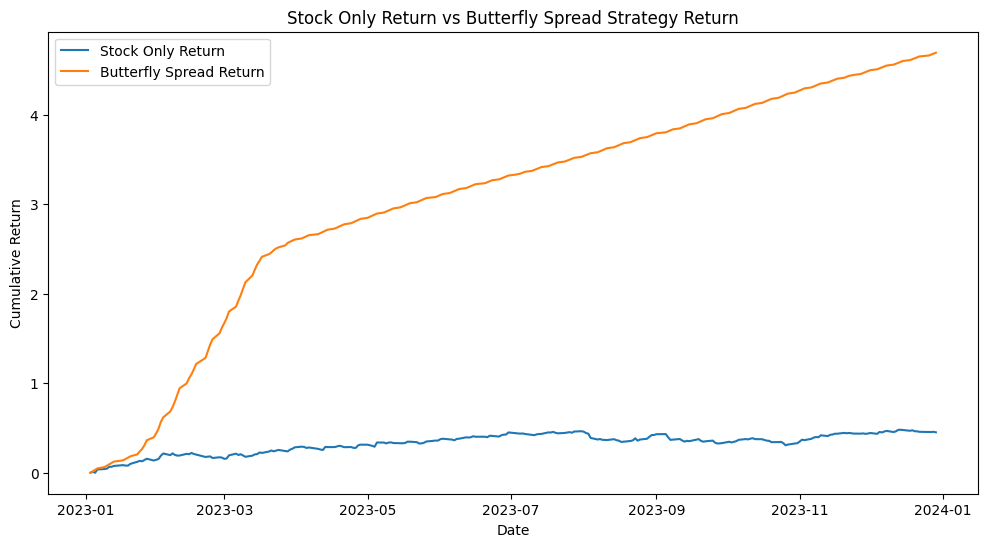

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 다운로드
ticker = 'AAPL'  # 예시로 애플 주식을 사용
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# 종가 데이터 사용
data = data[['Close']]
data.columns = ['Stock Price']

# Butterfly Spread 설정
strike_price_lower = 140
strike_price_middle = 150
strike_price_upper = 160
premium_paid_lower = 5   # 낮은 행사가격의 콜 옵션 매수 시 지불한 프리미엄 (예시)
premium_received_middle = 10  # 중간 행사가격의 콜 옵션 매도 시 받은 프리미엄 (예시, 2개의 옵션 매도)
premium_paid_upper = 3  # 높은 행사가격의 콜 옵션 매수 시 지불한 프리미엄 (예시)

# 주식만 보유한 경우의 수익률 계산
data['Stock Return'] = data['Stock Price'].pct_change().fillna(0)

# Butterfly Spread 수익 계산 함수
def calculate_butterfly_spread(stock_data, strike_price_lower, strike_price_middle, strike_price_upper, premium_paid_lower, premium_received_middle, premium_paid_upper):
    # 콜 옵션 손익 계산
    stock_data['Call Lower Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_lower,
                                                    stock_data['Stock Price'] - strike_price_lower,
                                                    0) - premium_paid_lower
    stock_data['Call Middle Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_middle,
                                                     strike_price_middle - stock_data['Stock Price'],
                                                     0) * 2 + premium_received_middle
    stock_data['Call Upper Profit/Loss'] = np.where(stock_data['Stock Price'] > strike_price_upper,
                                                    stock_data['Stock Price'] - strike_price_upper,
                                                    0) - premium_paid_upper
    # Butterfly Spread 전략의 총 수익 계산
    stock_data['Butterfly Spread Profit'] = stock_data['Call Lower Profit/Loss'] + stock_data['Call Middle Profit/Loss'] + stock_data['Call Upper Profit/Loss']

    # 총 수익률 계산
    stock_data['Butterfly Spread Return'] = stock_data['Butterfly Spread Profit'] / stock_data['Stock Price'].shift(1)
    stock_data['Butterfly Spread Return'].iloc[0] = 0  # 첫 번째 값은 손익 없음으로 설정

    return stock_data

# 수익 계산 실행
butterfly_spread_results = calculate_butterfly_spread(data, strike_price_lower, strike_price_middle, strike_price_upper, premium_paid_lower, premium_received_middle, premium_paid_upper)

# 결과 출력
print(butterfly_spread_results[['Stock Price', 'Stock Return', 'Butterfly Spread Profit', 'Butterfly Spread Return']])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(butterfly_spread_results.index, butterfly_spread_results['Stock Return'].cumsum(), label='Stock Only Return')
plt.plot(butterfly_spread_results.index, butterfly_spread_results['Butterfly Spread Return'].cumsum(), label='Butterfly Spread Return')
plt.title('Stock Only Return vs Butterfly Spread Strategy Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()
